In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import yfinance as yf
%matplotlib inline

In [74]:
class MovingAverageCrossover:
    def __init__(self,capital,stock,start,end,short_peroid,long_peroid):
        self.data = None
        self.is_long = False
        self.short_peroid = short_peroid
        self.long_peroid = long_peroid
        self.capital = capital
        self.equity = [capital]
        self.stock = stock
        self.start = start
        self.end = end
    
    def download_data(self):
        stock_data = {}
        ticker = yf.download(self.stock,self.start,self.end)
        stock_data['price'] = ticker['Adj Close']
        self.data = pd.DataFrame(stock_data)
    
    def construct_signals(self):
        self.data['short_ma'] = self.data['price'].ewm(span=self.short_peroid).mean()
        self.data['long_ma'] = self.data['price'].ewm(span=self.long_peroid).mean()
    
    # Runs the strategy. Checks if already in a position. 
    def simulate(self):
        for index,row in self.data.iterrows():
            #Closing the long position (SELLING!)
            if row['short_ma'] < row['long_ma'] and self.is_long:
                self.equity.append(self.capital * row.price / price_when_buy)
                self.is_long = False
            elif row['short_ma'] > row['long_ma'] and not self.is_long:
                #Opening a long position (BUYING!!)
                price_when_buy = row['price']
                self.is_long = True

    
    def plot_signals(self):
        plt.figure(figsize=(12,6))
        plt.plot(self.data.price, label='Stock Price',color='red')
        plt.plot(self.data.short_ma, label='Short MA',color='blue')
        plt.plot(self.data.long_ma, label='Long MA',color='green')
        plt.xlabel('Date')
        plt.ylabel('Stock Price')
        plt.legend(loc='best')
        plt.show()
        
    def plot_equity(self):
        print('Profit of the trading strategy: %.2f%%' % ((float(self.equity[-1]) - float(self.equity[0]))/float(self.equity[0])*100))
        print('Actual capital: $%0.2f'% self.equity[-1])
        plt.figure(figsize=(12,6))
        plt.title('Equity Curve')
        plt.plot(self.equity,label='stock price', color='green')
        plt.xlabel('Date')
        plt.ylabel('Actual Capital')
        plt.show()
    # Just to check what the pandas iterrows() function returns.
    
    
    # Returns a Tuple containing the Index of a particular row and then a Series of each value, with the index of the
    # series being the name of the column for each particular value.
    def check_func(self):
        for index,row in self.data.iterrows():
            print('index:')
            print(index)
            print('\n and row \n')       
            print(row)
    
    

In [75]:
start_date = datetime.datetime(2010,1,1)
end_date = datetime.datetime(2020,1,1)

[*********************100%***********************]  1 of 1 completed


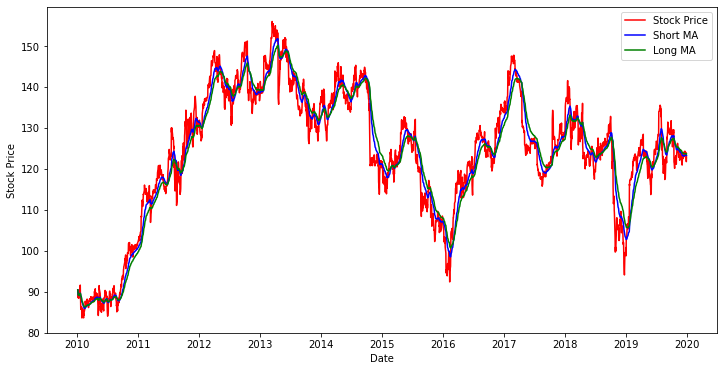

In [79]:
strategy = MovingAverageCrossover(100,'IBM',start_date,end_date,30,50)
strategy.download_data()
strategy.construct_signals()
strategy.plot_signals()
strategy.simulate()

Profit of the trading strategy: -6.71%
Actual capital: $93.29


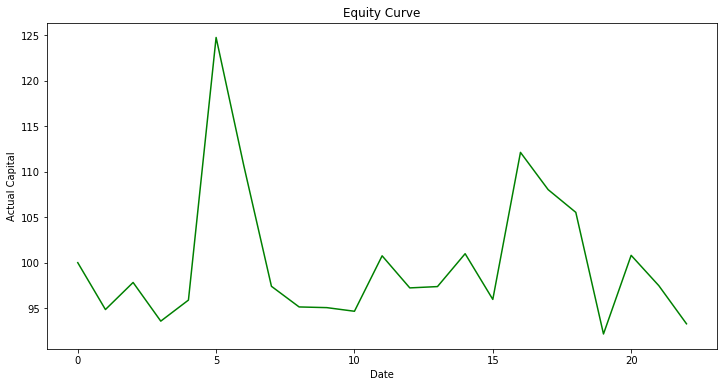

In [80]:
strategy.plot_equity()